## Objective
To quantify graph properties in the data

### Data Source
1. [NYC TLC](http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml)
    - Yellow 2016 December
    
```
$ head yellow_tripdata_2016-12.csv
$ wc -l yellow_tripdata_2016-12.csv
$ cut -d , -f 8,9 yellow_tripdata_2016-12.csv > yellow_PUL_DOL_Graph.txt 
$ cat yellow_PUL_DOL_Graph.txt | sed "1 d" > yellow_PUL_DOL_Graph_nohead.txt 
$ rm yellow_PUL_DOL_Graph.txt
$ tr "," "\t" < yellow_PUL_DOL_Graph_nohead.txt > yellow_PUL_DOL_Graph.txt
```

- There are 10 million lines in the data file
- Shorten! 

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,10)
import seaborn as sns

In [2]:
import snap
import os
import sys

### Create directed graph

In [3]:
fname = "yellow_PUL_DOL_Graph.txt"
col1 = 1 - 1
col2 = 2 - 1

In [4]:
G = snap.LoadEdgeList(snap.PNGraph,fname,col1,col2)

In [5]:
print "\ngraph nodes %d, edges %d" % (G.GetNodes(), G.GetEdges())


graph nodes 262, edges 27080


In [6]:
WccV = snap.TIntPrV()
snap.GetWccSzCnt(G, WccV)
print "\n# of connected component sizes", WccV.Len()


# of connected component sizes 1


In [7]:
print "\n# of connected component sizes", WccV.Len()
for comp in WccV:
    print "size %d, number of components %d" % (comp.GetVal1(), comp.GetVal2())


# of connected component sizes 1
size 262, number of components 1


In [8]:
MxWcc = snap.GetMxWcc(G)
print "\nmax wcc nodes %d, edges %d" % (MxWcc.GetNodes(), MxWcc.GetEdges())


max wcc nodes 262, edges 27080


In [9]:
InDegCntV = snap.TIntPrV()
snap.GetInDegCnt(G, InDegCntV)
print "\n# of different in-degrees", InDegCntV.Len()


# of different in-degrees 120


In [10]:
'''
for item in InDegCntV:
    print "in-degree %d, number of nodes %d" % (item.GetVal1(), item.GetVal2())
'''

'\nfor item in InDegCntV:\n    print "in-degree %d, number of nodes %d" % (item.GetVal1(), item.GetVal2())\n'

In [11]:
OutDegCntV = snap.TIntPrV()
snap.GetOutDegCnt(G, OutDegCntV)
print "\n# of different out-degrees", OutDegCntV.Len()


# of different out-degrees 151


In [12]:
'''
for item in OutDegCntV:
    print "out-degree %d, number of nodes %d" % (item.GetVal1(), item.GetVal2())
'''

'\nfor item in OutDegCntV:\n    print "out-degree %d, number of nodes %d" % (item.GetVal1(), item.GetVal2())\n'

### Get Page Rank

In [13]:
PRankH = snap.TIntFltH()
snap.GetPageRank(G, PRankH)

Hash table ....

In [31]:
type(PRankH)

snap.TIntFltH

In [30]:
lPRank = sorted(PRankH, key = lambda key: PRankH[key], reverse = True)

In [32]:
print "\ntop 10 experts by PageRank"
for item in lPRank[:10]:
    print "id %7s, pagerank %.6f" % (item, PRankH[item]) 


top 10 experts by PageRank
id      44, pagerank 0.021227
id     265, pagerank 0.014389
id      27, pagerank 0.011263
id     132, pagerank 0.010668
id     264, pagerank 0.008206
id     138, pagerank 0.006748
id     170, pagerank 0.006588
id     230, pagerank 0.005863
id      75, pagerank 0.005809
id      48, pagerank 0.005673


In [33]:
for item in PRankH:
    print item

264
163
143
164
229
246
107
161
162
186
226
157
148
79
114
68
140
132
234
224
230
113
36
231
13
137
138
65
223
238
189
144
255
158
48
50
237
170
18
166
14
88
141
239
232
49
142
249
100
41
87
254
136
146
7
233
261
125
243
38
74
209
25
263
42
218
43
236
258
66
198
262
80
129
4
168
90
51
45
28
133
244
116
211
33
75
151
145
97
181
112
188
76
37
54
1
24
257
216
10
265
190
62
91
196
256
228
152
40
202
17
220
241
61
127
71
225
95
208
260
89
179
52
193
82
121
242
106
194
67
98
167
3
101
185
195
227
200
22
173
213
165
39
126
259
197
77
150
201
169
47
160
235
115
108
191
147
69
12
102
247
94
219
153
124
21
16
130
56
72
180
35
9
85
155
29
217
70
183
159
92
134
178
83
123
250
135
46
26
73
248
210
84
203
128
177
182
171
55
252
119
175
6
20
215
78
187
11
15
192
32
34
131
31
93
174
149
58
251
122
139
19
63
81
64
96
172
205
86
176
44
212
57
53
118
27
245
5
60
204
221
117
23
206
240
30
120
8
111
207
222
59
184
214
156
105
253
109
154
99
2
199


In [35]:
print type(lPRank)
print len(lPRank)
# print PRankH[]

sortedPRkey = []
sortedPR = []

for item, val in enumerate(lPRank):
    sortedPRkey.append(item) 
    sortedPR.append(PRankH[val]) 

<type 'list'>
262


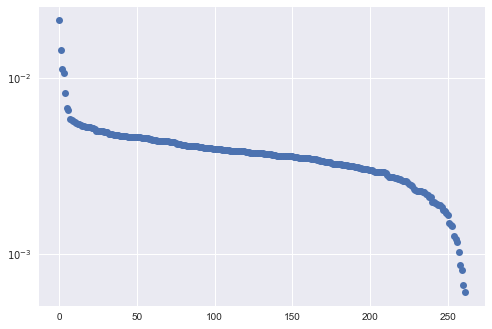

In [36]:
plt.gca().set_yscale('log')
plt.plot(sortedPR, 'o')
plt.show()

Very few nodes appear prominent

#### Hash properly

In [20]:
NIdHubH = snap.TIntFltH()
NIdAuthH = snap.TIntFltH()
snap.GetHits(G, NIdHubH, NIdAuthH)

In [18]:
lAuth = sorted(NIdAuthH, key = lambda key: NIdAuthH[key], reverse = True)
print "\ntop 10 experts by Hits"


top 10 experts by Hits


In [19]:
for item in lAuth[:10]:
    print "id %7s, authority rank %.6f" % (item, NIdAuthH[item])

id     132, authority rank 0.083657
id     264, authority rank 0.082190
id     265, authority rank 0.081600
id     138, authority rank 0.080902
id     230, authority rank 0.079899
id      48, authority rank 0.079303
id     161, authority rank 0.078768
id     162, authority rank 0.078451
id       7, authority rank 0.078450
id     186, authority rank 0.078401


In [21]:
lHub = sorted(NIdHubH, key = lambda key: NIdHubH[key], reverse = True)

In [22]:
for item in lHub[:10]:
    print "id %7s, hub rank %.6f" % (item, NIdHubH[item])

id     132, hub rank 0.110319
id     138, hub rank 0.110147
id     170, hub rank 0.110117
id      48, hub rank 0.109902
id     162, hub rank 0.109768
id     186, hub rank 0.109678
id     100, hub rank 0.109566
id      79, hub rank 0.109547
id     230, hub rank 0.109448
id     234, hub rank 0.109286


In [26]:
sortedAuthkey = []
sortedAuth = []

for item, val in enumerate(lAuth):
    sortedAuthkey.append(item) 
    sortedAuth.append(NIdAuthH[val]) 

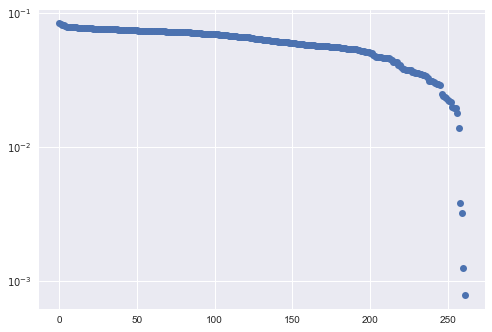

In [27]:
plt.gca().set_yscale('log')
plt.plot(sortedAuth, 'o')
plt.show()

In [28]:
sortedHubkey = []
sortedHub = []

for item, val in enumerate(lHub):
    sortedHubkey.append(item) 
    sortedHub.append(NIdHubH[val]) 

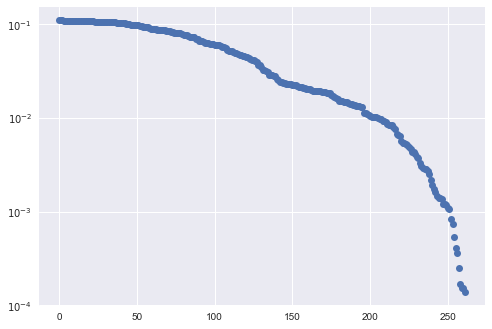

In [29]:
plt.gca().set_yscale('log')
plt.plot(sortedHub, 'o')
plt.show()

### Degree Distribution 

In [33]:
snap.PlotInDegDistr(G, "yellow 2016", "yellow 2016 In Degree")

In [34]:
yellowInD = pd.read_csv('inDeg.yellow 2016.tab', skiprows=3, sep='\t')

In [35]:
yellowInD.describe()

,# In-degree,Count
count,120.000000,120.000000
mean,93.608333,2.183333
std,42.301498,1.506196
min,1.000000,1.000000
25%,59.750000,1.000000
50%,96.500000,2.000000
75%,126.250000,3.000000
max,206.000000,8.000000


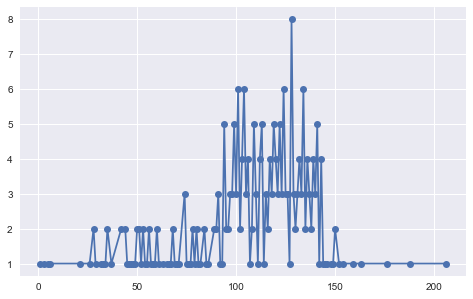

In [39]:
plt.figure(figsize=(8,4.95))
plt.plot(yellowInD['# In-degree'], yellowInD['Count'], '-o')
plt.show()